In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')
sys.path.insert(0, './../scripts')

In [2]:
from importlib import reload

import pickle

import numpy as np
import tensorflow as tf
import logging
from scipy import linalg

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable

import plot_func as pf
import util_func as uf

import dev_ori_sel_RF
from dev_ori_sel_RF import data_dir,integrator_tf,dynamics,network,run_onelayer,probe_RFs
from dev_ori_sel_RF.tools import misc,update_params_dict,analysis_tools

2023-07-16 17:03:48.872276: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Please install GPU version of TF


In [3]:
def get_network_size(config_name):
    config_dict = misc.load_external_params("params_"+config_name)
    config_dict.update({"config_name" : config_name})

    N4 = config_dict["N4"]
    Nlgn = config_dict["Nlgn"]
    Nret = config_dict["Nret"]
    Nlgnpop = 2
    N4pop = config_dict["num_lgn_paths"] // Nlgnpop
    
    return config_dict,N4pop,Nlgnpop,Nret,Nlgn,N4

def get_network_system(Version,config_name):
    if Version == -1:
        config_dict = misc.load_external_params("params_"+config_name,False)
        config_dict.update({
                        "RF_mode" : "initialize",
                        "system" : "one_layer",
                        "Version" : Version,
                        })
        net = network.Network(Version,config_dict,verbose=False)
    else:
        load_location = 'local'
        load_path = data_dir + "layer4/{s}/v{v}/".format(s=config_name,v=Version)
        config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))
        config_dict.update({"config_name" : config_name})
        config_dict["Wlgn_to4_params"].update({
            "W_mode": "load_from_external",
            "load_from_prev_run" : Version})
        net = network.Network(Version,config_dict,load_location=load_location,verbose=False)
    return net.system

In [9]:
reload(run_onelayer)
reload(integrator_tf)

config_name = "bettina"

config_dict = misc.load_external_params("params_"+config_name)
config_dict.update({"config_name" : config_name})

Version = 0
run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
MISC params_dict params_bettina {'Nret': 32, 'Nlgn': 32, 'N4': 32, 'N23': 1, 'Nvert': 1, 'runtime': 16000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.0225, 'sigma2': 0.06, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.03375, 'ampl': 1.0, 'profile': 'Gaussian', 'mea

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 

In [22]:
config_dict = misc.load_external_params("params_"+config_name)
config_dict.update({"config_name" : config_name})

config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : 0})

reload(run_onelayer)
reload(integrator_tf)
Version = 1
run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

MISC params_dict params_init_gauss {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 1.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_eccentrici

L4 11 57.81135 79.70738 0 0
key dW_lgn_e 11 1.1457816 2.4396572
key dW_lgn_i 11 1.3061931 2.3490396
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.4381933, shape=(), dtype=float32)

Plasticity step: 12, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 12 60.222523 77.9054 0 0
key dW_lgn_e 12 1.0975225 2.4072654
key dW_lgn_i 12 1.2296774 2.3538861
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.0029883, shape=(), dtype=float32)

Plasticity step: 13, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 13 56.24277 78.34625 0 0
key dW_lgn_e 13 1.0565001 2.3779333
key dW_lgn_i 13 1.2238709 2.2995157
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.4875584, shape=(), dtype=float32)

Plasticity step: 14, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 14 60.148838 72.796875 0 0
key dW_lgn_e 14 1.1895169 2.235076
key dW_lgn_i 14 1.3214762 2.24021
CHECK SHAPE2 (320000,)

In [4]:
config_name = "bettina"
Version = 7
config_dict,N4pop,Nlgnpop,Nret,Nlgn,N4,rA = uf.get_network_size(config_name)
if config_name=="test":
    Nret = 32
    Nlgn = 32
    N4 = 32
    rA = ceil(0.15*N4)

MISC params_dict params_bettina {'Nret': 32, 'Nlgn': 32, 'N4': 32, 'N23': 1, 'Nvert': 1, 'runtime': 16000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.0225, 'sigma2': 0.06, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.03375, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_eccentr

In [5]:
_,Wlgnto4,arbor_on,arbor_off,arbor2,_,W4to4 = uf.get_network_system(Version,config_name)

3.5521853671098285
-3.11595207641213
3.58334488787395
-3.11595207641213


Text(0.5, 1.0, 'L4 I Cell (Pre)')

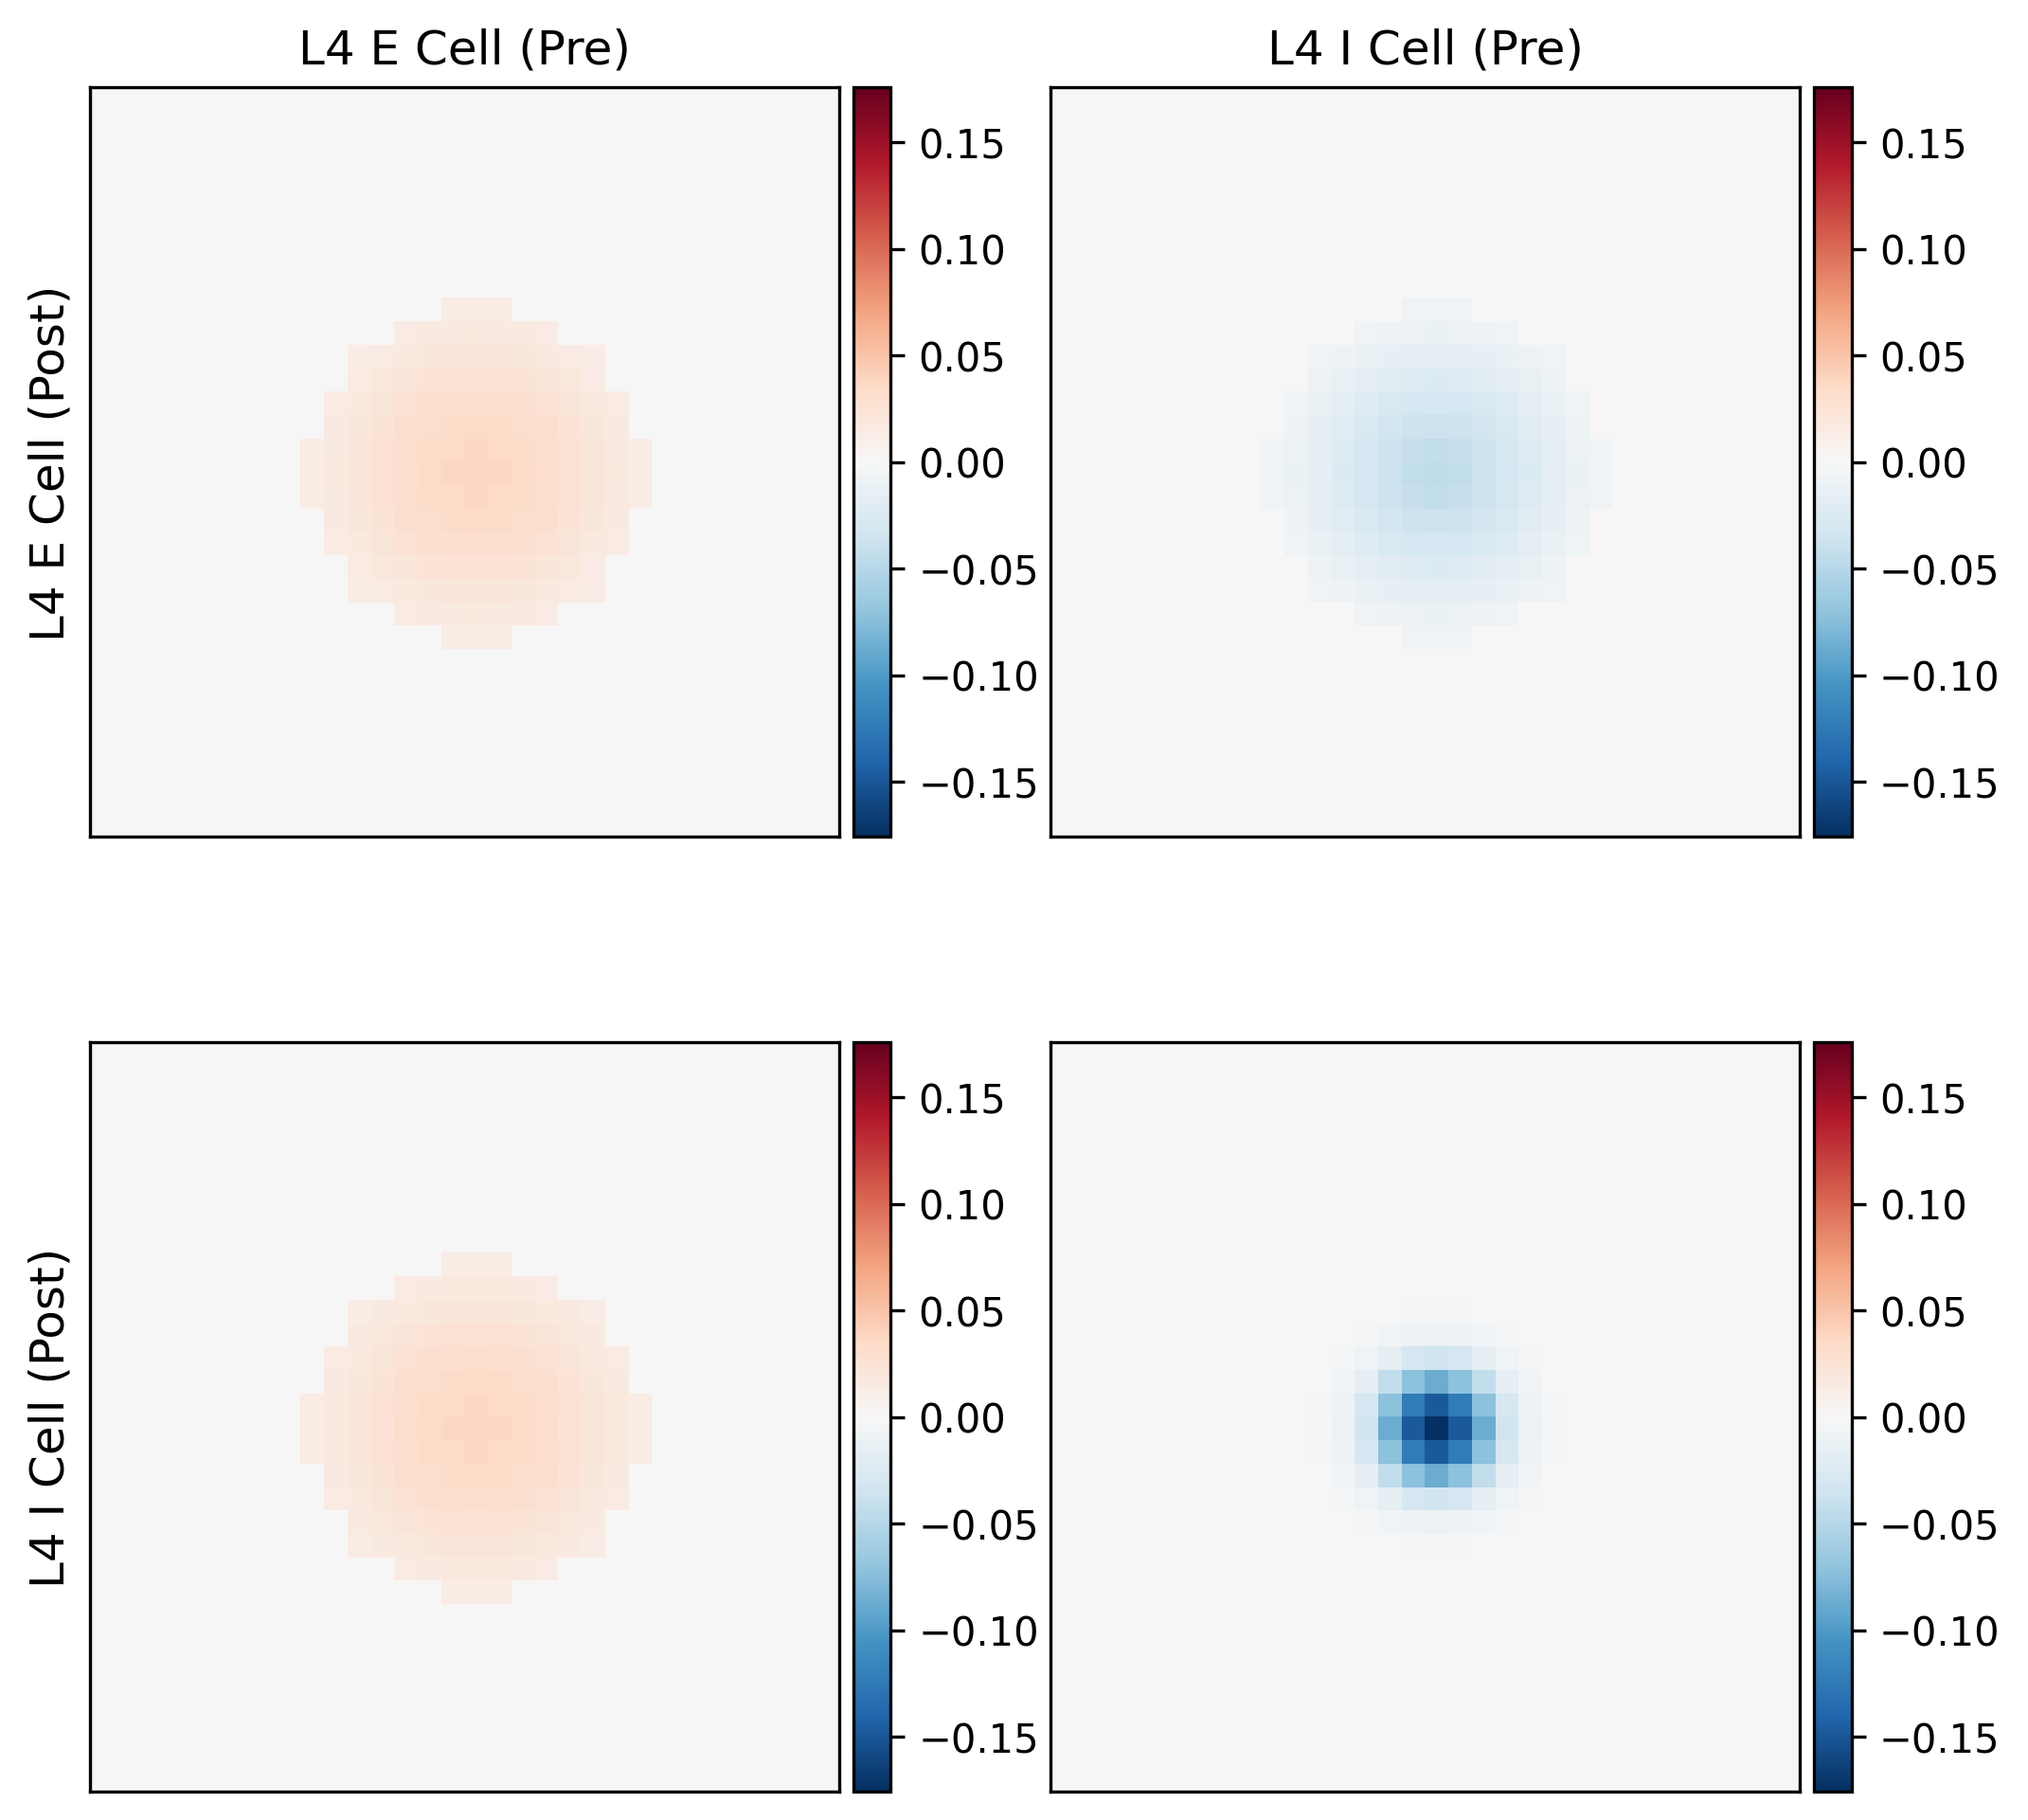

In [6]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4)),vmax=np.max(np.abs(W4to4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[0,1],W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4)),vmax=np.max(np.abs(W4to4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,0],W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4)),vmax=np.max(np.abs(W4to4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,1],W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4)),vmax=np.max(np.abs(W4to4)),cmap='RdBu_r')
print(np.sum(W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('L4 E Cell (Pre)',fontsize=12)
axs[0,1].set_title('L4 I Cell (Pre)',fontsize=12)

(4, 1024, 1024)


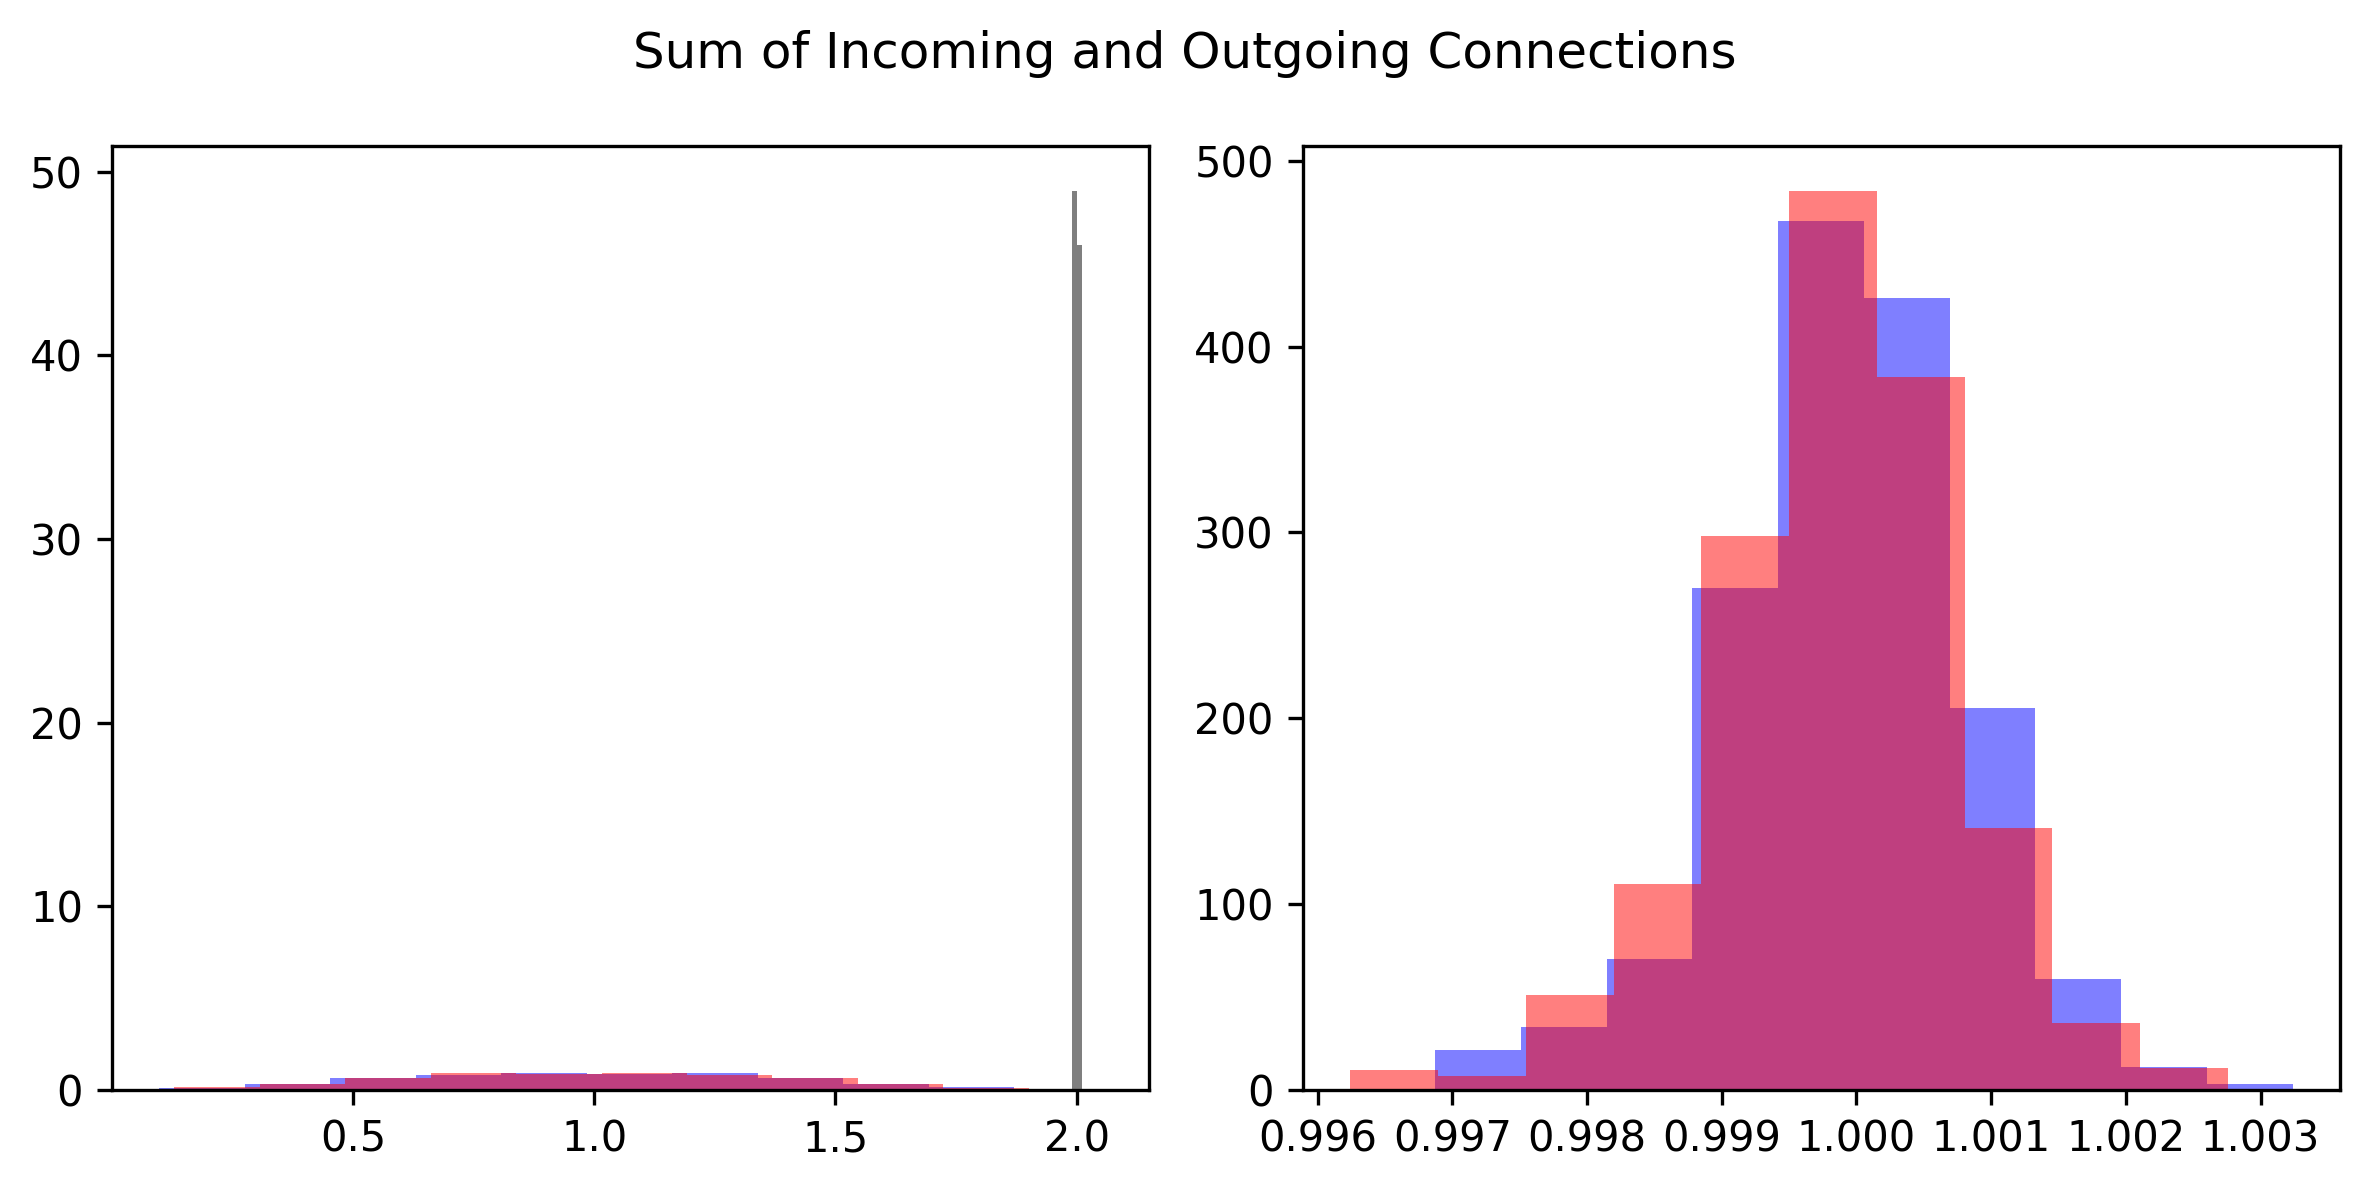

In [5]:
_,Wlgnto4,arbor_on,arbor_off,arbor2,_,W4to4 = uf.get_network_system(Version,config_name)
    
print(Wlgnto4.shape)
Wlgnto4.reshape(N4pop,Nlgnpop,N4*N4,Nlgn*Nlgn)
                
fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

for i in range(2):
    axs[0].hist(Wlgnto4.reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[0,i].reshape(N4**2,Nlgn**2).sum(1),density=True,
                color=['b','r'][i],alpha=0.5)
    axs[1].hist(Wlgnto4.reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[0,i].reshape(N4**2,Nlgn**2).sum(0),density=True,
                color=['b','r'][i],alpha=0.5)
Wpresum = Wlgnto4.reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[0,:].reshape(Nlgnpop,N4**2,Nlgn**2).sum((0,2))
axs[0].hist(Wpresum,
            bins=np.linspace(np.min(Wpresum)-0.05,np.max(Wpresum)+0.05,11),density=True,color='k',alpha=0.5)

fig.suptitle(r'Sum of Incoming and Outgoing Connections')
fig.tight_layout()

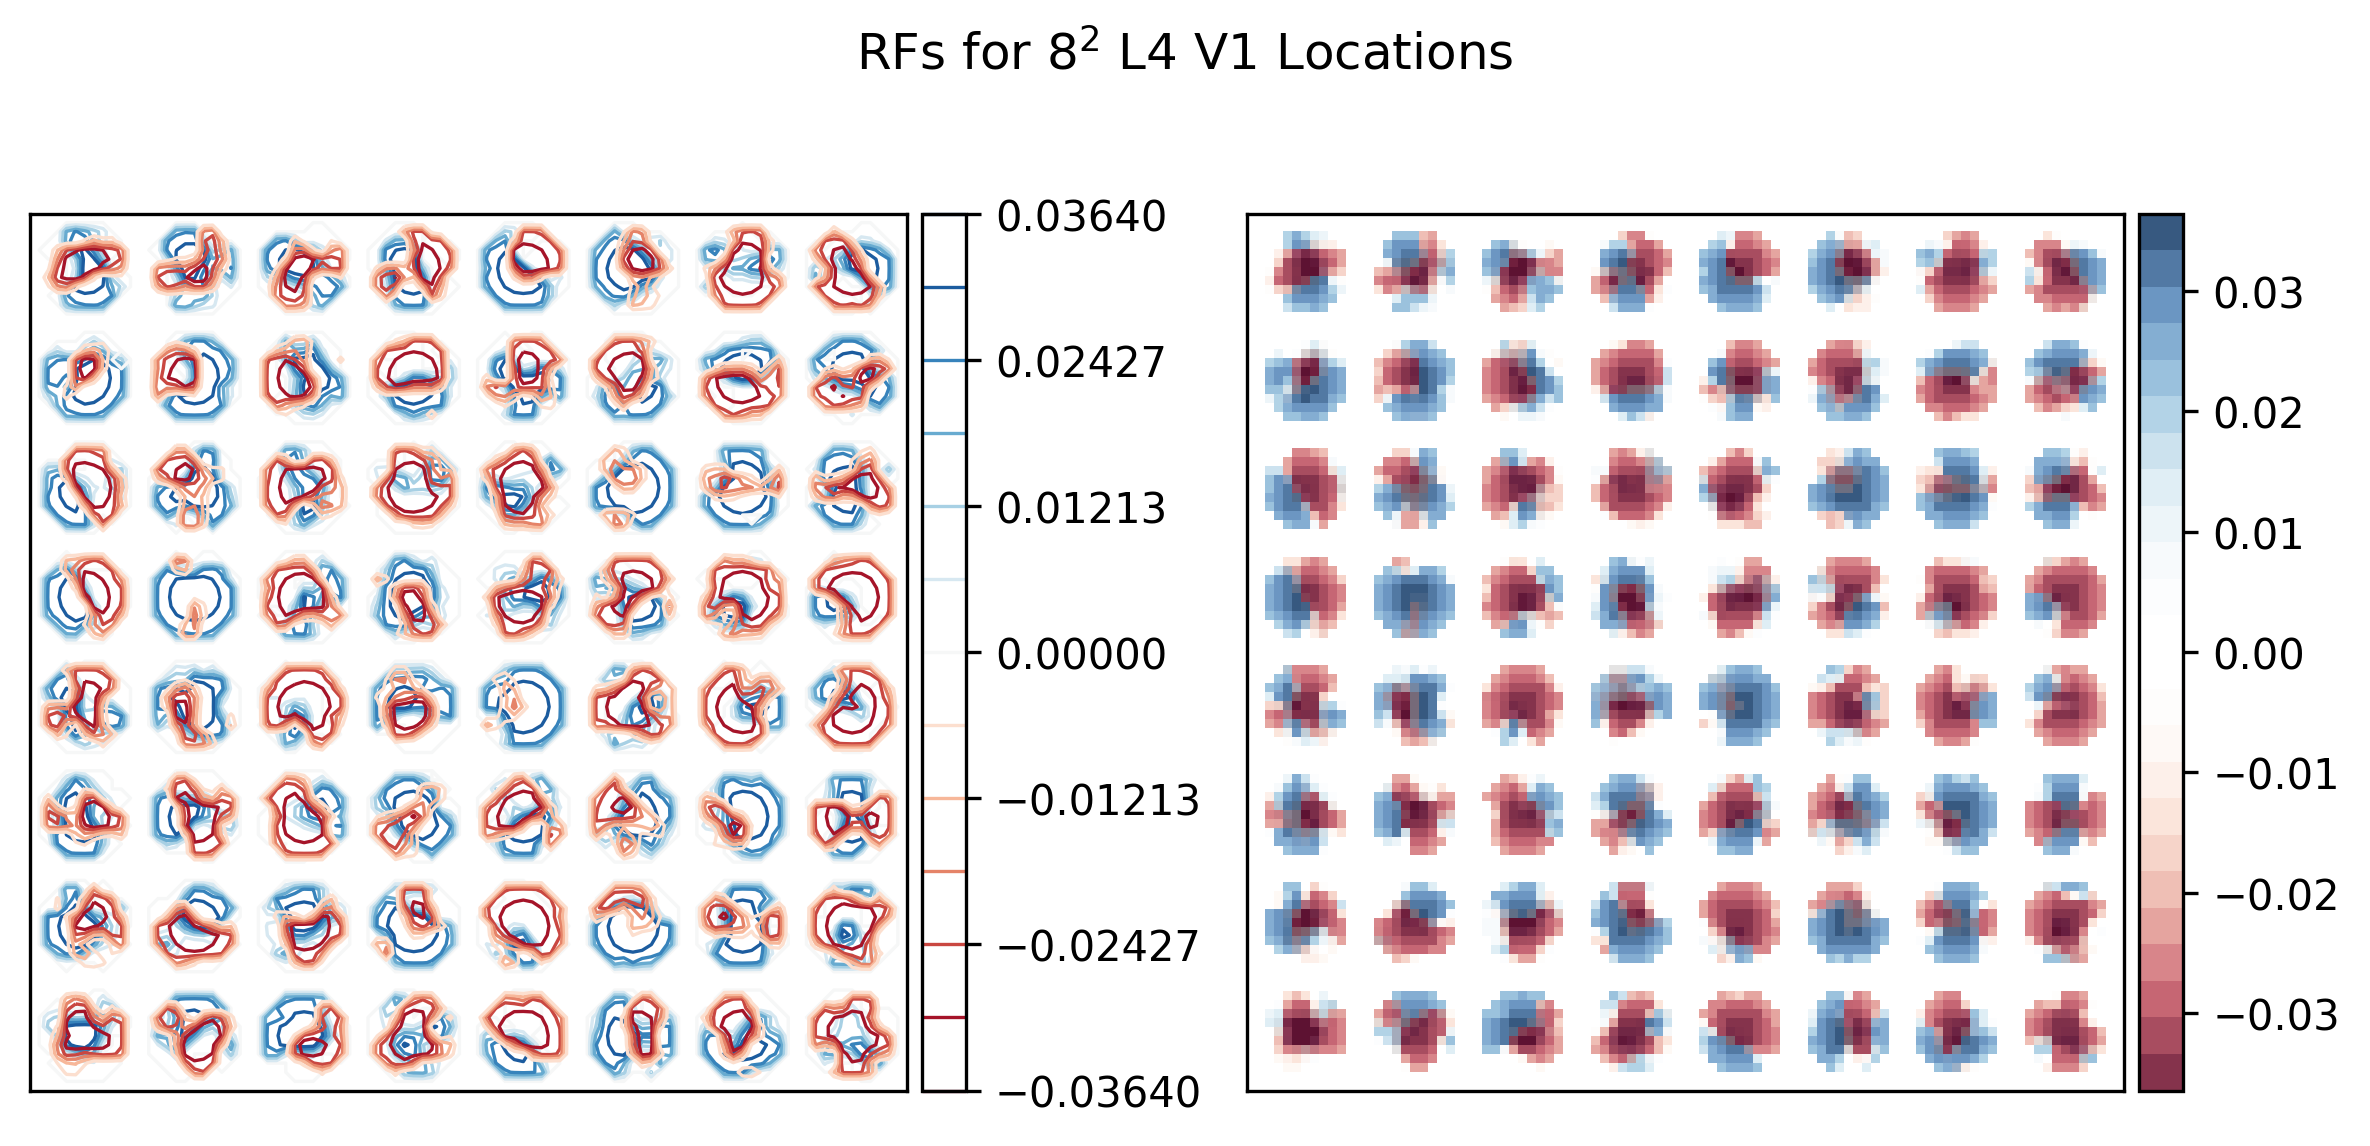

In [6]:
reload(network)
_,Wlgnto4,arbor_on,arbor_off,arbor2,_,W4to4 = get_network_system(Version,config_name)

dA = 2*rA+1

idxs = np.arange(N4//16,N4,N4//8)

wff = np.zeros((N4pop,Nlgnpop,len(idxs)*(dA+1)+1,len(idxs)*(dA+1)+1))
for i in range(len(idxs)):
    for j in range(len(idxs)):
        this_wff = Wlgnto4.reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[:,:,idxs[i],idxs[j],:,:]
        wff[:,:,1+i*(dA+1):1+i*(dA+1)+dA,1+j*(dA+1):1+j*(dA+1)+dA] =\
               np.roll(this_wff,(rA-idxs[i],rA-idxs[j]),axis=(-2,-1))[:,:,:dA,:dA]
rf = wff[:,0]-wff[:,1]

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace=.1, wspace=.3)
pf.doubcontbar(fig,axs[0],wff[0,0],-wff[0,1],
               cmap='RdBu',levels=np.linspace(-np.max(np.abs(wff[0])),np.max(np.abs(wff[0])),13),linewidths=0.8)
pf.doubimshbar(fig,axs[1],wff[0,0],-wff[0,1],cmap='RdBu',vmin=-np.max(np.abs(wff[0])),vmax=np.max(np.abs(wff[0])))

fig.suptitle(r'RFs for {:d}$^2$ L4 V1 Locations'.format(len(idxs)))
fig.tight_layout()

In [7]:
reload(probe_RFs)

config_name = 'lower_wlim'
Version = 31
net,act,phase = probe_RFs.probe_RFs_one_layer(Version,config_name,freqs=Nlgn*np.array([6,7]),Nsur=4)

mode in get_RFs load_from_external
 
Load ff connection from version 31
 
profile_conn Gaussian
CHECK radius 0.225
arbor (32, 32, 32, 32)
CHECK radius 0.225
arbor (32, 32, 32, 32)
CHECK radius 0.225
arbor (32, 32, 32, 32)
CHECK radius 0.225
arbor (32, 32, 32, 32)

CHECK CONN VALS Gaussian 0.11742580199604473 0.11845585289074688 0.14265764105777248 0.5639701277863146
orig max ew 3.048827378288413 0.95
max_ew 0.95
WEE=3.5521853671098533,WEI=3.115952076412152,WIE=3.583344887873975,WII=3.1159520764121527
omega_i=Wie-Wee=0.031159520764121762
omega_e=Wii-Wei=4.440892098500626e-16

mode in generate_inputs moving_grating_online_sharp
lgn (2, 2048, 1, 4, 4)
(2, 2, 1024, 4, 4)
(2, 1024, 4, 4, 2)
(2, 1024, 4, 2, 4)
(2, 1024, 2, 4, 4)
Wlgn_to_4 (4, 1024, 1024) (2, 1024, 2, 4, 4)
It (20001, 2048) (20001, 2048)
temp_freq 10
pref_phase 0.0 0.0
pref_phase 0.0 0.0
Spat frequency=192, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 192
It (20001, 2048) (20001, 2048)
temp_freq 10
pref_phase 1.6110731556870732 1.6110731556870732
pref_phase 1.6110731556870732 1.6110731556870732
Spat frequency=192, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 192
It (20001, 2048) (20001, 2048)
temp_freq 10
pref_phase 3.2221463113741464 3.2221463113741464
pref_phase 3.2221463113741464 3.2221463113741464
Spat frequency=192, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 192
It (20001, 2048) (20001, 2048)
temp_freq 10
pref_phase 4.994326782629928 4.994326782629928
pref_phase 4.994326782629928 4.994326782629928
Spat frequency=192, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 192


KeyboardInterrupt: 

In [68]:
maxver = 8
Vers = np.arange(0,maxver+1,np.fmax(1,maxver//8))-1

config_name = 'lower_wlim'

config_dict,N4pop,Nlgnpop,Nret,Nlgn,N4,rA = uf.get_network_size(config_name)

oris = np.zeros((len(Vers),N4,N4))
sels = np.zeros((len(Vers),N4,N4))
ori_ffts = np.zeros((len(Vers),N4,N4))
ori_fpss = np.zeros((len(Vers),int(np.ceil(N4//2*np.sqrt(2)))))
seps = np.zeros((len(Vers),N4,N4))
bals = np.zeros((len(Vers),N4,N4))

for idx,Version in enumerate(Vers):
    Wlgnto4 = uf.get_network_weights(Version,config_name,N4pop,N4,Nlgn)

    ss = Wlgnto4[0,...] + Wlgnto4[1,...]
    sd = Wlgnto4[0,...] - Wlgnto4[1,...]
    ss = ss.reshape((N4,N4,Nlgn,Nlgn))
    sd = sd.reshape((N4,N4,Nlgn,Nlgn))
    DA = 2*rA + 5
    opm,Rn = analysis_tools.get_response(sd,DA)
    
    oris[idx],sels[idx],ori_ffts[idx],ori_fpss[idx] = uf.get_ori_sel(opm)
    seps[idx] = np.abs(sd).sum((-2,-1))/ss.sum((-2,-1))
    bals[idx] = 1-np.abs(sd.sum((-2,-1)))/ss.sum((-2,-1))

fig,axs = plt.subplots(10,len(Vers),figsize=(4*len(Vers),4*10),dpi=300,sharex='row',sharey='row')
for i,Version in enumerate(Vers):
    pf.imshowbar(fig,axs[0,i],oris[i],cmap='twilight',vmin=0,vmax=180)
    pf.imshowbar(fig,axs[1,i],sels[i],cmap='binary',vmin=0,vmax=np.max(sels))
    pf.imshowbar(fig,axs[2,i],seps[i],cmap='binary',vmin=0,vmax=1)
    pf.imshowbar(fig,axs[3,i],bals[i],cmap='binary',vmin=0,vmax=1)
    nbin = 20
    def bin_edges(data,nbin):
        return np.linspace(np.min(data),np.max(data),nbin+1)
    axs[4,i].hist(oris[i].flatten(),bin_edges(oris,nbin))
    axs[4,i].axhline(N4*N4/nbin,color='k',ls='--')
    axs[5,i].hist(sels[i].flatten(),bin_edges(sels,nbin))
    axs[5,i].axvline(np.mean(sels[i].flatten()),color='k',ls='--')
    axs[6,i].hist(seps[i].flatten(),bin_edges([0,1],nbin))
    axs[6,i].axvline(np.mean(seps[i].flatten()),color='k',ls='--')
    axs[7,i].hist(bals[i].flatten(),bin_edges([0,1],nbin))
    axs[7,i].axvline(np.mean(bals[i].flatten()),color='k',ls='--')
    
    pf.imshowbar(fig,axs[8,i],ori_ffts[i],cmap='binary',vmin=0,vmax=np.max(ori_ffts))
    axs[9,i].plot(np.arange(0,np.ceil(N4//2*np.sqrt(2))),ori_fpss[i])
    
    axs[0,i].set_title('Simulation Step {:d}'.format(Version+1))
    
axs[0,0].set_ylabel('Preferred Orientation')
axs[1,0].set_ylabel('Orientation Selectivity')
axs[2,0].set_ylabel('Subregion Separation Index')
axs[3,0].set_ylabel('Subregion Balance Index')
axs[4,0].set_ylabel('Preferred Orientation (Count)')
axs[5,0].set_ylabel('Orientation Selectivity (Count)')
axs[6,0].set_ylabel('Subregion Separation Index (Count)')
axs[7,0].set_ylabel('Subregion Balance Index (Count)')
axs[8,0].set_ylabel('Preferred Orientation (DFT)')
axs[9,0].set_ylabel('Preferred Orientation (PFS)')

plt.savefig("./../plots/Ori_Sel_Dev_FF_Plasticity_"+config_name+".pdf")

MISC params_dict params_lower_wlim {'Nret': 32, 'Nlgn': 32, 'N4': 32, 'N23': 1, 'Nvert': 1, 'runtime': 16000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.0225, 'sigma2': 0.06, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.03375, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_ecce

MISC params_dict params_lower_wlim {'Nret': 32, 'Nlgn': 32, 'N4': 32, 'N23': 1, 'Nvert': 1, 'runtime': 16000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.0225, 'sigma2': 0.06, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.03375, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_ecce

MISC params_dict params_lower_wlim {'Nret': 32, 'Nlgn': 32, 'N4': 32, 'N23': 1, 'Nvert': 1, 'runtime': 16000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.0225, 'sigma2': 0.06, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.03375, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_ecce

KeyboardInterrupt: 

In [69]:
reload(uf)

<module 'util_func' from '/Users/tuannguyen/OrientationSSB/notebooks/./../scripts/util_func.py'>